In [90]:
import pandas as pd
base = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/Bases/teste3.csv')

In [58]:
base

,Data,PRECIPITACAO TOTAL,PRESSAO ATMOSFERICA,TEMPERATURA DO PONTO DE ORVALHO,TEMPERATURA MAXIMA,TEMPERATURA MEDIA,TEMPERATURA MINIMA,UMIDADE RELATIVA DO AR MEDIA,UMIDADE RELATIVA DO AR MINIMA,VENTO RAJADA MAXIMA DIARIA,VENTO VELOCIDADE MEDIA DIARIA,Pontos,Preco_Real,Preco_Dolar
0,2006-08-23,NaN,908908333.0,8504167.0,45196.0,19066667.0,45055.0,54291667.0,260.0,45116.0,1720833.0,355121.0,23983,11145
1,2006-08-24,0.0,909345833.0,9308333.0,44955.0,20195833.0,44968.0,55708333.0,190.0,45024.0,1045833.0,3579726.0,23955,11121
2,2006-08-25,0.0,908729167.0,8420833.0,45104.0,19933333.0,45059.0,50208333.0,250.0,90.0,195.0,3595752.0,2382,11043
3,2006-08-28,44969.0,906158333.0,45061.0,44983.0,19291667.0,45183.0,80333333.0,510.0,44963.0,920833.0,3637451.0,23076,10783
4,2006-08-29,4.0,9071125.0,151125.0,45104.0,212125.0,45154.0,715.0,380.0,45146.0,1725.0,3630367.0,23169,10837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,2023-05-17,0.0,907933333.0,8445833.0,45104.0,15754167.0,44991.0,6875.0,220.0,45173.0,3125.0,10945995.0,104237,21105
4169,2023-05-18,0.0,909254167.0,9004167.0,45164.0,162875.0,80.0,67416667.0,290.0,45020.0,366667.0,11010846.0,104339,20998
4170,2023-05-19,0.0,908975.0,9154167.0,45134.0,1615.0,45023.0,69625.0,270.0,45172.0,3.0,11074451.0,105764,21148
4171,2023-05-22,0.0,908758333.0,10175.0,45009.0,15441667.0,45145.0,73833333.0,410.0,45053.0,5125.0,11021312.0,104061,20942


In [91]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['PRECIPITACAO TOTAL', 'PRESSAO ATMOSFERICA',
       'TEMPERATURA DO PONTO DE ORVALHO', 'TEMPERATURA MAXIMA',
       'TEMPERATURA MEDIA', 'TEMPERATURA MINIMA',
       'UMIDADE RELATIVA DO AR MEDIA', 'UMIDADE RELATIVA DO AR MINIMA',
       'VENTO RAJADA MAXIMA DIARIA', 'VENTO VELOCIDADE MEDIA DIARIA', 'Pontos',
       'Preco_Real', 'Preco_Dolar'],
      dtype='object')


Index(['Data', 'PRECIPITACAO TOTAL', 'PRESSAO ATMOSFERICA',
       'TEMPERATURA DO PONTO DE ORVALHO', 'TEMPERATURA MAXIMA',
       'TEMPERATURA MEDIA', 'TEMPERATURA MINIMA',
       'UMIDADE RELATIVA DO AR MEDIA', 'UMIDADE RELATIVA DO AR MINIMA',
       'VENTO RAJADA MAXIMA DIARIA', 'VENTO VELOCIDADE MEDIA DIARIA', 'Pontos',
       'Preco_Real', 'Preco_Dolar'],
      dtype='object')
RMSE: 42711.01375116895


C:\Users\milen\AppData\Local\Temp\ipykernel_42904\2145407248.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


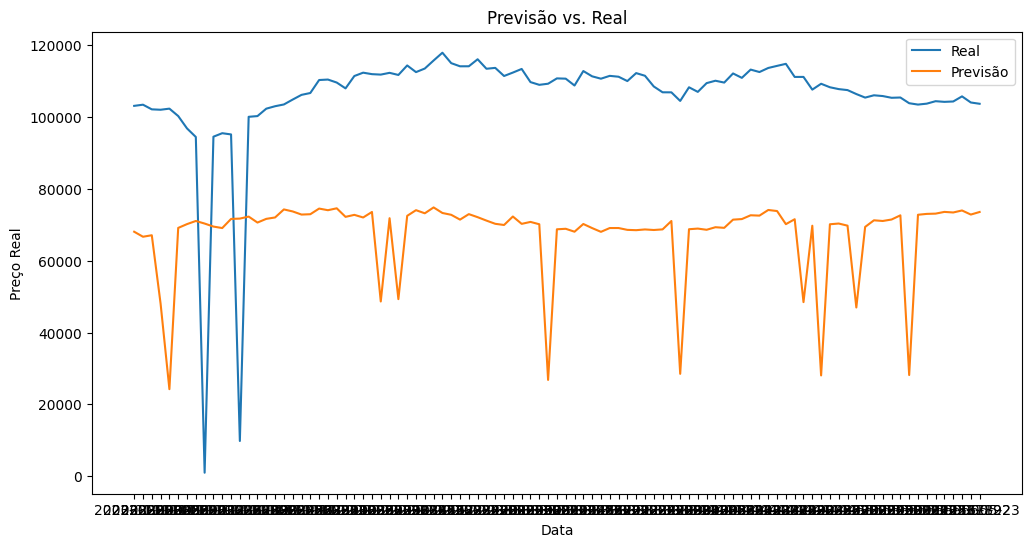

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o DataFrame

import pandas as pd
base = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/Bases/teste3.csv')
df = base
# Carregando os dados
df = base  # Substitua 'base' pelo seu DataFrame
df.columns = df.columns.str.strip()
print(df.columns)

# Divisão dos Dados
train_data = df[df['Data'] < '2023-01-01']
test_data = df[df['Data'] >= '2023-01-01']

# Escolha do Modelo
model = LinearRegression()

# Treinamento do Modelo
X_train = train_data[['TEMPERATURA MAXIMA', 'Preco_Dolar','Pontos','UMIDADE RELATIVA DO AR MINIMA']]
X_train.fillna(X_train.mean(), inplace=True)
y_train = train_data['Preco_Real']
model.fit(X_train, y_train)

# Previsões
X_test = test_data[[ 'TEMPERATURA MAXIMA', 'Preco_Dolar','Pontos','UMIDADE RELATIVA DO AR MINIMA']]
y_test = test_data['Preco_Real']
predictions = model.predict(X_test)

# Avaliação do Modelo
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse}")

# Visualização dos Resultados
plt.figure(figsize=(12, 6))
sns.lineplot(x=test_data['Data'], y=y_test, label="Real")
sns.lineplot(x=test_data['Data'], y=predictions, label="Previsão")
plt.xlabel("Data")
plt.ylabel("Preço Real")
plt.title("Previsão vs. Real")
plt.legend()
plt.show()


In [101]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
base = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/Bases/teste3.csv')

# Carregando os dados
data = base  # Substitua 'base' pelo seu DataFrame

data['Data'] = pd.to_datetime(data['Data'])  # Use o nome correto da coluna de data
data.set_index('Data', inplace=True)

# Divisão dos Dados
train_data = df[df.index < '2023-01-01']
test_data = df[df.index >= '2023-01-01']

# Ajuste do modelo ARIMA
p, d, q = 1, 1, 1  # Parâmetros do modelo ARIMA (ajuste conforme necessário)
model = ARIMA(train_data['Preco_Real'], order=(p, d, q))
model_fit = model.fit()

# Previsões
predictions = model_fit.forecast(steps=len(test_data))

# Avaliação do Modelo
rmse = np.sqrt(mean_squared_error(test_data['Preco_Real'], predictions))
print(f"RMSE: {rmse}")

# Visualização dos Resultados
plt.figure(figsize=(12, 6))
sns.lineplot(x=test_data.index, y=test_data['Preco_Real'], label="Real")
sns.lineplot(x=test_data.index, y=predictions, label="Previsão")
plt.xlabel("Data")
plt.ylabel("Preço Real")
plt.title("Previsão vs. Real")
plt.legend()
plt.show()

Index(['Data', 'PRECIPITACAO TOTAL', 'PRESSAO ATMOSFERICA',
       'TEMPERATURA DO PONTO DE ORVALHO', 'TEMPERATURA MAXIMA',
       'TEMPERATURA MEDIA', 'TEMPERATURA MINIMA',
       'UMIDADE RELATIVA DO AR MEDIA ', 'UMIDADE RELATIVA DO AR MINIMA ',
       'VENTO RAJADA MAXIMA DIARIA ', 'VENTO VELOCIDADE MEDIA DIARIA ',
       'Pontos', 'Preco_Real', 'Preco_Dolar'],
      dtype='object')


TypeError: Invalid comparison between dtype=int64 and str